In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [5]:
class KMeans():
    """Class implements Kmeans clustering alg."""

    def __init__(self, X, n_clusters, iters):
        self.X = X
        self.n_clusters = n_clusters
        self.iters = iters

    def initialize_centroids(self):
        """
        Create cluster centroids using the k-means++ algorithm.
        """

        centroids = [self.X[0]]

        for _ in range(1, self.n_clusters):
            dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in self.X])
            probs = dist_sq/dist_sq.sum()
            cumulative_probs = probs.cumsum()
            r = np.random.rand()
            
            for j, p in enumerate(cumulative_probs):
                if r < p:
                    i = j
                    break
            
            centroids.append(self.X[i])

        self.centroids = np.array(centroids)

    def findClosestCentroids(self):
        """
        Computes the centroid memberships for every example.
        """

        n_samples = len(self.X)

        # Initialize a 2D matrix to hold distance between each sample and each cluster
        distance = np.zeros(shape=(n_samples, self.n_clusters))

        # Compute distance between samples and each centroid
        for k in range(len(self.centroids)):
            # Subtract two vectors and compute 2nd norm to get distance
            distance[:, k] = np.linalg.norm(self.X - self.centroids[k], ord=2, axis=1) 

        # Cluster points to centroids with minimum distances
        self.idx = np.argmin(distance, axis=1)
        
    def computeCentroids(self):
        """
        Returns the new centroids by computing the means of the data points
        assigned to each centroid.
        """

        for k in range(self.n_clusters):
            mask = (self.idx == k)
            self.centroids[k, :] = np.sum(self.X[mask, :], axis=0) / np.sum(mask)

    def fit(self):
        """Cluster dataset"""
        self.initialize_centroids()

        # Perform Kmeans
        for i in range(self.iters):
            # Find the closest centroids for the examples using the initial_centroids
            self.findClosestCentroids()
            # Compute means based on the closest centroids found in the previous part.
            self.computeCentroids() 
        
        # Compute inertia
        inertia = []
        for i in range(self.n_clusters):
            mask = (self.idx == i)
            inertia.append(np.sum(np.linalg.norm(self.X[mask] - self.centroids[i], axis=1)))

        self.inertia = np.mean(inertia)

Inertia:  79.4176363371587


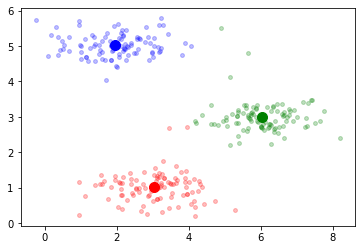

In [6]:
# Load an example dataset that we will be using
data = loadmat('datafile.mat')
X = data['X']

kmeans = KMeans(X, 3, iters=5000)
kmeans.fit()

idx, centroids = kmeans.idx, kmeans.centroids
colors = ['blue', 'red', 'green']
for i in range(len(centroids)):
    # plot centroids
    plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i], s=100)

    #plot clusters
    mask = (idx == i)
    cluster = X[mask, :]
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], s=15, alpha=0.25)

print('Inertia: ', kmeans.inertia)

Text(0.5, 1.0, 'Elbow plot')

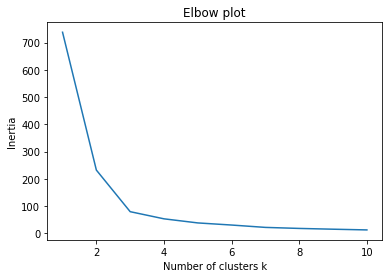

In [7]:
# Elbow plot
k_trials = [i for i in range(1, 11)]
trial_inertia = []

for i in k_trials:
    kmeans = KMeans(X, n_clusters=i, iters=5000)
    kmeans.fit()
    trial_inertia.append(kmeans.inertia)

plt.plot(k_trials, trial_inertia)
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow plot')